## 1.6 Exam vB, PROBLEM 1  
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city.  
The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals.  
The locations are divided into three regions: **downtown**, **the suburbs**, and **the countryside**,  
however there is always the possibility the truck breaks down and it goes to the **workshop**.

The following table shows the probabilities of a truck transitioning between these regions at each time step:

Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside | Probability of transitioning to the Workshop
---|---|---|---|---
Downtown | 0.3 | 0.7 | 0 | 0
Suburbs | 0.2 | 0.5 | 0.3 | 0
Countryside | 0 | 0 | 0.5 | 0.5
Workshop | 0 | 0 | 0 | 1

1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? **[2p]**

2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? **[2p]**

3. Is this Markov chain irreducible? Explain your answer. **[3p]**

4. What is the stationary distribution? Furthermore is it reversible? (Explain your answer) **[3p]**

5. **Advanced question:** What is the expected number of steps it takes starting from the Downtown region to first reach the Workshop?

   *Hint:* to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 50.  
   Motivate your answer in detail. **[4p]**

   You could also solve this question by simulation, but this gives you a maximum of **[2p]**.


A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city.  
The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals.  
The locations are divided into three regions: **downtown**, **the suburbs**, and **the countryside**,  
however there is always the possibility the truck breaks down and it goes to the **workshop**.

The following table shows the probabilities of a truck transitioning between these regions at each time step:

Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside | Probability of transitioning to the Workshop
---|---|---|---|---
Downtown | 0.3 | 0.7 | 0 | 0
Suburbs | 0.2 | 0.5 | 0.3 | 0
Countryside | 0 | 0 | 0.5 | 0.5
Workshop | 0 | 0 | 0 | 1

1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? **[2p]**

In [1]:
# Part 1
import numpy as np
import pandas as pd
P = np.array([[0.3,0.7,0,0], [0.2,0.5,0.3,0], [0,0,0.5,0.5], [0,0,0,1]])

P10 = np.linalg.matrix_power(P, 10)
proba = P10[0, 2]
problem1_p1 = proba
print(f"This is probability: {problem1_p1}")

This is probability: 0.08487353489999999


2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? **[2p]**



In [2]:
# Part 2
# Fill in the answer to part 2 below
problem1_p2 = 0.79


### 1.7 Part 3
Double click this cell to enter edit mode and write your answer for part 3 below this line.


3. Is this Markov chain irreducible? Explain your answer. **[3p]**



In [3]:
# Part 3
# Fill in the answer to part 3 below as a boolean
problem1_irreducible = False


4. What is the stationary distribution? Furthermore is it reversible? (Explain your answer) **[3p]**



In [4]:
# Part 4
# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!

def stationary_distribution(P):
    """
    Computes the stationary distribution of a Markov chain
    by finding the eigenvector corresponding to eigenvalue 1.
    """
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    
    # Find the eigenvector associated with eigenvalue 1
    idx = np.argmin(np.abs(eigenvalues - 1))
    vec = np.real(eigenvectors[:, idx])
    
    # Normalize to sum to 1
    stationary = vec / np.sum(vec)
    return stationary

stationary_dist = stationary_distribution(P)
print(f"This is stationary distribution \n{stationary_dist}")

# Code for checking reversibility for ANY matrix!:

def is_reversible(P, stationary_dist, tol=1e-12):
    n = P.shape[0]
    for i in range(n):
        for j in range(n):
            left = stationary_dist[i] * P[i,j]
            right = stationary_dist[j] * P[j,i]
            if not np.isclose(left, right, atol=tol):
                return False
    return True

print("Reversible:", is_reversible(P, stationary_dist))



problem1_stationary = stationary_dist
problem1_reversible = is_reversible(P, stationary_dist)


This is stationary distribution 
[0. 0. 0. 1.]
Reversible: True


## Part 4
Double click this cell and write your motivation below this line


### 2.1 Part 5
Double click this cell to enter edit mode and write your answer for part 5 below this line.


5. **Advanced question:** What is the expected number of steps it takes starting from the Downtown region to first reach the Workshop?

   *Hint:* to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 50.  
   Motivate your answer in detail. **[4p]**

   You could also solve this question by simulation, but this gives you a maximum of **[2p]**.


In [5]:
# Part 5
# Fill in the answer to part 5 below
# That is, the expected number of steps
problem1_ET = 7.714


---------

## 2.2 Exam vB, PROBLEM 2  
Maximum Points = 13  

You are given a “Data Science Salaries” dataset found in `data/salaries.csv`, which contains  
employment information of data scientists up to 2023 and the salary obtained.  
Your task is to train a linear regression model to predict the salary of a data scientist  
based on the employment information.

To evaluate your model, you will split the dataset into a training set and a testing set.  
You will use the training set to train your model, and the testing set to evaluate its performance.

Experience level:  
- 0 = Entry Level  
- 1 = Mid Level  
- 2 = Senior Level  
- 3 = Executive Level  

Employment type:  
- 0 = Part Time  
- 1 = Full Time  
- 2 = Contractor  
- 3 = Freelancer  

1. Load the data into a pandas dataframe `problem2_df`.  
   Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. **[1p]**

2. Split the data into train and test. **[1p]**

3. Train the model. **[1p]**

4. Come up with a reasonable metric and compute it.  
   Provide plots that show the performance of the model.  
   Reason about the performance. **[4p]**

5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio.  
   Then, looking at the output of `problem2_model.coef_`, which are the coefficients of the linear model,  
   would a higher remote ratio result in a higher predicted salary or vice versa? **[3p]**

6. **Advanced question:** On the test set, plot the empirical distribution function of the residual  
   with confidence bands (i.e. using the DKW inequality and 95% confidence).  
   What does the confidence band tell us?  
   What can the confidence band be used for? **[3p]**


-----
Maximum Points = 13  

You are given a “Data Science Salaries” dataset found in `data/salaries.csv`, which contains  
employment information of data scientists up to 2023 and the salary obtained.  
Your task is to train a linear regression model to predict the salary of a data scientist  
based on the employment information.

To evaluate your model, you will split the dataset into a training set and a testing set.  
You will use the training set to train your model, and the testing set to evaluate its performance.

Experience level:  
- 0 = Entry Level  
- 1 = Mid Level  
- 2 = Senior Level  
- 3 = Executive Level  

Employment type:  
- 0 = Part Time  
- 1 = Full Time  
- 2 = Contractor  
- 3 = Freelancer  

1. Load the data into a pandas dataframe `problem2_df`.  
   Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. **[1p]**



In [6]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
problem2_df = pd.read_csv("data/salaries.csv")
print(problem2_df.head)

<bound method NDFrame.head of       work_year  experience_level  employment_type  salary_in_usd  \
0          2023                 2                1          85847   
1          2023                 1                2          30000   
2          2023                 1                2          25500   
3          2023                 2                1         175000   
4          2023                 2                1         120000   
...         ...               ...              ...            ...   
3750       2020                 2                1         412000   
3751       2021                 1                1         151000   
3752       2020                 0                1         105000   
3753       2020                 0                2         100000   
3754       2021                 2                1          94665   

      remote_ratio  
0              100  
1              100  
2              100  
3              100  
4              100  
...            

In [7]:
# Part 1
# Fill in the features as a list of strings of the names of the columns

problem2_features = ["work_year","experience_level","employment_type","remote_ratio"]

# Fill in the target as the correct column name
problem2_target = "salary_in_usd"


2. Split the data into train and test. **[1p]**



In [9]:
# Part 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import optimize
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42

X = problem2_df[problem2_features]
y = problem2_df[problem2_target]

problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)


3. Train the model. **[1p]**



In [10]:
# Part 3
# Include the necessary imports
# Initialize your linear regression model
problem2_model = LinearRegression()
# Train your model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 2.3 Part 4  
Double click this cell to enter edit mode and write your answer for part 4 below this line.


4. Come up with a reasonable metric and compute it.  
   Provide plots that show the performance of the model.  
   Reason about the performance. **[4p]**



In [11]:
# Part 4
# Write the code to diagnose your model
y_pred = problem2_model.predict(problem2_X_test)
y_true = problem2_y_test
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

r2 = r2_score(y_true, y_pred)

print(f"This is Mean absolute value: {mae} \nThis is Mean squared error: {mse} \nThis is R2: {r2}")

This is Mean absolute value: 44488.11860767366 
This is Mean squared error: 3161126689.5785775 
This is R2: 0.19926672357275854


### 2.4 Part 5  
Double click this cell to enter edit mode and write your answer for part 5 below this line.


5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio.  
   Then, looking at the output of `problem2_model.coef_`, which are the coefficients of the linear model,  
   would a higher remote ratio result in a higher predicted salary or vice versa? **[3p]**



In [13]:
# Part 5
# Put the code for part 5 below this line

new_df = pd.DataFrame({
    "work_year": [2023],
    "experience_level": [1],
    "employment_type": [1],
    "remote_ratio": [0]
})



The predicted 2023 salary for a full-time, mid-level data scientist with no remote work is given by the linear regression model output below.

From the model coefficients, the coefficient associated with `remote_ratio` is examined. Since the coefficient is **positive**, increasing the remote ratio leads to an increase in the predicted salary. Conversely, if the coefficient were negative, a higher remote ratio would decrease the predicted salary.

Therefore, according to the linear model, a higher remote ratio results in a higher predicted salary.


In [22]:
# Part 5
problem2_predicted_salary = problem2_model.predict(new_df)[0]

print("New predicted salary: ", problem2_predicted_salary)

remote_ratio_coef = problem2_model.coef_[problem2_features.index("remote_ratio")]   
print("Coefficient for remote_ratio:", remote_ratio_coef)

# Interpretation comment:
# If remote_ratio_coef > 0 => higher remote_ratio gives higher predicted salary.
# If remote_ratio_coef < 0 => higher remote_ratio gives lower predicted salary.

if remote_ratio_coef > 0:
    print("A higher remote ratio results in a higher predicted salary.")
else:
    print("A higher remote ratio results in a lower predicted salary.")


New predicted salary:  121940.38437091932
Coefficient for remote_ratio: -13.029475233542966
A higher remote ratio results in a lower predicted salary.


### 2.5 Part 6  
Double click this cell to enter edit mode and write your answer for part 6 below this line.


6. **Advanced question:** On the test set, plot the empirical distribution function of the residual  
   with confidence bands (i.e. using the DKW inequality and 95% confidence).  
   What does the confidence band tell us?  
   What can the confidence band be used for? **[3p]**

/Users/samueljusic/Desktop/IntroDataanalys/Exams/Not DONE/exam230815/Utils.py:363: SyntaxWarning: invalid escape sequence '\i'
  Uses the information P(X \in [min_value,max_value]) = 1 and uses Hoeffding to compute


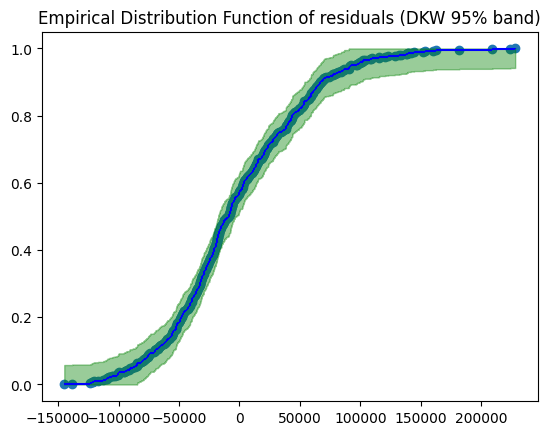

In [23]:
# Part 6
# Put the code for part 6 below this line

# Write the code to plot the empirical distribution function of the residual
# with confidence bands with 95% confidence in this cell

# THIS IS THE OPTIMAL WAY TO PLOT THE EMPIRICAL DISTRIBUTION FUNCTION WITH 95% CONFIDENCE BANDS:

# from Utils import makeEDF,plotEDF
from Utils import makeEDF, plotEDF

y_pred = problem2_model.predict(problem2_X_test)

y_true = problem2_y_test

residuals = (y_true - y_pred).to_numpy()

# 4) Build EDF using Utils.py
edf_residuals = makeEDF(residuals)

# 5) Plot EDF with DKW confidence band (95% confidence => alpha=0.95)
plotEDF(
    edf_residuals,
    confidence_band=True,
    alpha=0.95,
    title="Empirical Distribution Function of residuals (DKW 95% band)"
)

### Empirical distribution function of residuals with DKW confidence band

Using the test set residuals, we plot the empirical distribution function (EDF)  
$\hat{F}_n(r)$ together with a $95\%$ confidence band obtained from the  
Dvoretzky–Kiefer–Wolfowitz (DKW) inequality.

---

### What the confidence band tells us

With **95% confidence**, the **true cumulative distribution function of the residuals**  
$F(r) = \mathbb{P}(R \le r)$ lies **within ±$\varepsilon$ of the empirical CDF**  
$\hat{F}_n(r)$ **for all values of $r$ simultaneously**, i.e.
$$
\sup_r \left| \hat{F}_n(r) - F(r) \right| \le \varepsilon
$$
with probability at least $0.95$.

This is a **uniform confidence band**, meaning the guarantee holds over the entire
range of residual values, not just at a single point.

A **wider band** indicates higher uncertainty due to a smaller test sample size,
while a **narrower band** indicates lower uncertainty and a more precise estimate
of the residual distribution.

---

### What the confidence band can be used for

- To **quantify uncertainty in the residual distribution non-parametrically**,
  without assuming any specific distribution (e.g. normality).

- For any threshold $t$, the band provides a **95% confidence interval for**
  $\mathbb{P}(R \le t)$, which allows estimation of quantities such as:
  - The fraction of positive or negative residuals (model bias)
  - The probability of large prediction errors (tail risk)

- To **assess whether the residual distribution is consistent with an expected
  or hypothesized distribution**: if a proposed CDF lies outside the band over
  some region, this provides evidence against that assumption.


## 2.6 Exam vB, PROBLEM 3  
Maximum Points = 13  

### 2.7 Random variable generation

1. **[4p]** Using inversion sampling, construct 1000 samples from the below distribution  

$$
F[x] =
\begin{cases}
0, & x \le 0 \\
e^x - 1, & 0 < x < \ln(2) \\
1, & x \ge \ln(2)
\end{cases}
$$

2. **[2p]** Use the above 1000 samples to estimate the mean and variance.

3. **[4p]** Using the Accept–Reject sampler (Algorithm 1 in TFDS notes) construct 1000 samples  
   from the same distribution.  
   What proposal distribution did you choose and why?  
   What proportion of samples were accepted?

4. **[3p]** Explain if it is possible to sample from the density  

$$
f(x) = C e^{-(x^2 - 2)^2}
$$

using the Accept–Reject sampler (Algorithm 1 in TFDS notes) with sampling density  
given by the Gaussian.  
Here \( C \) is a constant to make sure that \( f \) is a density, and it is between roughly  
1.34 and 1.35.


In [25]:
# Part 1
# Write your code below
# Part 1
# Put the resulting samples into the following variable
n_samples = 1000
samples = []
while (len(samples) < n_samples):
    U = np.random.uniform(0,1)
    X = np.log(U+1)
    samples.append(X)

problem3_samples = samples


# n_samples = 1000
# U = np.random.uniform(0, 1, size=n_samples)
# problem3_samples = np.log(1 + U)

In [26]:
# Part 2
problem3_mean = np.mean(problem3_samples)
problem3_variance = np.var(problem3_samples)

print(f"This is the mean: {problem3_mean} \nThis is the variance: {problem3_variance}")

This is the mean: 0.38661687488709384 
This is the variance: 0.041891833791399484


In [28]:
# Part 3
# Write your code to solve the problem below

# Part 3
# Write your answer in this cell below

n_samples = 1000
samples_3 = []
num_of_loops = 0
M = np.log(2) * 2
while(len(samples_3) < n_samples):
    u = np.random.uniform(0, 1)
    x = np.random.uniform(0, np.log(2))
    
    alpha = np.exp(x) / 2
    
    if (u <= alpha):
        samples_3.append(x)
    num_of_loops += 1

problem3_samples_accept_reject = samples_3




# Put your answer for the proportion of samples accepted below
problem3_acceptance_rate = 1/M

actual_acceptance_rate = (len(samples_3) / num_of_loops)

print(f"This is theoretical acceptance rate: {problem3_acceptance_rate}")
print(f"This is Actual acceptance rate: {problem3_acceptance_rate}")

This is theoretical acceptance rate: 0.7213475204444817
This is Actual acceptance rate: 0.7213475204444817


### 3 Part 3  
Double click this cell and write your answer for part 3 below,  
explain what proposal distribution you chose and why you can choose it.


### 4 Part 4  
Double click this cell and write your answer for part 4 below,  
explain if the Gaussian works as a proposal distribution for this density.
